# Importing Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
# https://drive.google.com/file/d/18Vy24f7Hknv0pqm4a0u0jr_VYgZSlB6x/view?usp=sharing
# https://drive.google.com/file/d/1qVQ34AXPMk0dxqbu8HbKbubu8LWHKdyk/view?usp=sharing
# https://drive.google.com/file/d/1DlvSLg6Al5T-roY1UfVgsvgiknPkoIsa/view?usp=sharing

# Getting the Data

In [4]:
!gdown 18Vy24f7Hknv0pqm4a0u0jr_VYgZSlB6x
!gdown 1qVQ34AXPMk0dxqbu8HbKbubu8LWHKdyk
!gdown 1DlvSLg6Al5T-roY1UfVgsvgiknPkoIsa

Downloading...
From: https://drive.google.com/uc?id=18Vy24f7Hknv0pqm4a0u0jr_VYgZSlB6x
To: /content/Content.csv
100% 158k/158k [00:00<00:00, 21.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qVQ34AXPMk0dxqbu8HbKbubu8LWHKdyk
To: /content/Reactions.csv
100% 2.65M/2.65M [00:00<00:00, 57.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DlvSLg6Al5T-roY1UfVgsvgiknPkoIsa
To: /content/ReactionTypes.csv
100% 388/388 [00:00<00:00, 1.10MB/s]


In [5]:
content = pd.read_csv('/content/Content.csv')
reactions = pd.read_csv('/content/Reactions.csv')
reactiontypes = pd.read_csv('/content/ReactionTypes.csv')

# Content

In [6]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [7]:
content.shape

(1000, 6)

In [8]:
content.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [9]:
content.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Category', 'URL'], dtype='object')

In [10]:
# dropping 'Unnamed: 0', 'User ID', 'URL'
content = content[['Content ID', 'Type', 'Category']]

In [11]:
content.shape

(1000, 3)

In [12]:
content.isnull().sum()

Content ID    0
Type          0
Category      0
dtype: int64

In [13]:
content.columns

Index(['Content ID', 'Type', 'Category'], dtype='object')

In [14]:
# Rename columns
content.rename(columns={'Type': 'Content_Type'}, inplace=True)

In [15]:
content['Category'] = content['Category'].str.strip('"').str.lower()

In [16]:
content['Category'].value_counts()

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: Category, dtype: int64

# Reactions

In [17]:
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [18]:
reactions.shape

(25553, 5)

In [19]:
reactions.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [20]:
# dropping columns that are not needed
reactions = reactions[['Content ID', 'Type']]

In [21]:
reactions = reactions.dropna()

In [22]:
# Rename columns
reactions.rename(columns={'Type': 'Reaction_Type'}, inplace=True)

<ipython-input-22-830508ce7d27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactions.rename(columns={'Type': 'Reaction_Type'}, inplace=True)


In [23]:
reactions.columns

Index(['Content ID', 'Reaction_Type'], dtype='object')

In [24]:
reactions['Reaction_Type'] = reactions['Reaction_Type'].str.replace('"', '')

<ipython-input-24-fa6fa04c07c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactions['Reaction_Type'] = reactions['Reaction_Type'].str.replace('"', '')


# Reaction Types

In [25]:
reactiontypes.head(16)

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [26]:
reactiontypes.shape

(16, 4)

In [27]:
reactiontypes.isnull().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [28]:
reactiontypes= reactiontypes[['Type', 'Score']]

In [29]:
# Rename columns
reactiontypes.rename(columns={'Type': 'Reaction_Type'}, inplace=True)

# Join Datasets

In [30]:
merged_df1 = pd.merge(reactions,content, on=['Content ID'], how='inner')

In [31]:
merged_df1

,Content ID,Reaction_Type,Content_Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,photo,studying
...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,audio,technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,audio,technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,audio,technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,audio,technology


In [32]:
merged_df2 = pd.merge(merged_df1,reactiontypes, on=['Reaction_Type'], how='inner')

In [33]:
merged_df2

,Content ID,Reaction_Type,Content_Type,Category,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,photo,studying,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,photo,healthy eating,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,photo,healthy eating,0
...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,audio,veganism,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,audio,veganism,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,GIF,culture,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,GIF,culture,72


In [34]:
sorted_df = merged_df2.sort_values(by='Score', ascending=False)

In [35]:
sorted_df

,Content ID,Reaction_Type,Content_Type,Category,Score
14639,7913b30d-19fd-4900-8a68-ce141192b3ec,super love,audio,cooking,75
14863,10683ab8-914b-43ae-ad2d-b2fd6a48dc33,super love,audio,soccer,75
14872,d624685f-99a7-4aee-902b-283f5cf85ada,super love,photo,studying,75
14871,5b71c62f-2c89-4d19-991f-65fedd0b52fd,super love,video,education,75
14870,9c8be342-6cff-4d80-bf94-fd0fd8ccd845,super love,video,dogs,75
...,...,...,...,...,...
1020,d0c1d7f4-7735-49a9-ab6b-2cdb2338a609,disgust,GIF,travel,0
1021,d0c1d7f4-7735-49a9-ab6b-2cdb2338a609,disgust,GIF,travel,0
1022,d0c1d7f4-7735-49a9-ab6b-2cdb2338a609,disgust,GIF,travel,0
1023,f3e8d168-6fb9-48b9-8347-b35595162c1d,disgust,video,soccer,0


## Grouby and Sum

In [36]:
sorted_df2 = sorted_df.groupby('Category').agg({'Score': 'sum'})
sorted_df2

,Score
Category,
animals,74965
cooking,64756
culture,66579
dogs,52511
education,57436
fitness,55323
food,66676
healthy eating,69339
public speaking,49264


In [37]:
sorted_df2 = sorted_df2.sort_values(by='Score', ascending=False)

In [38]:
sorted_df2

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676
culture,66579
travel,64880
cooking,64756
soccer,57783


In [39]:
# Values you want to select
selected_values = ['animals', 'healthy eating', 'technology','science', 'food']

# Use boolean indexing to select rows with the specified values in 'Category'
selected_rows = sorted_df[sorted_df['Category'].isin(selected_values)]

# Display the selected rows
selected_rows

,Content ID,Reaction_Type,Content_Type,Category,Score
14896,cbf66fdd-cd86-4517-8081-181e45f13823,super love,photo,science,75
14891,9a25d0c6-1134-41d2-abc4-e893c41363bc,super love,video,science,75
14883,e1792fe6-28e0-49fc-8b01-0e027461d8b5,super love,GIF,technology,75
14882,e1792fe6-28e0-49fc-8b01-0e027461d8b5,super love,GIF,technology,75
14880,84a81261-6334-4ba5-978d-26a45d28a44f,super love,audio,animals,75
...,...,...,...,...,...
1010,cbf66fdd-cd86-4517-8081-181e45f13823,disgust,photo,science,0
1011,cbf66fdd-cd86-4517-8081-181e45f13823,disgust,photo,science,0
1012,18cb1ce7-fb66-4a56-8042-e38c9593ade1,disgust,photo,animals,0
1013,18cb1ce7-fb66-4a56-8042-e38c9593ade1,disgust,photo,animals,0


In [40]:
selected_rows = selected_rows.reset_index()

In [41]:
selected_rows = pd.DataFrame(selected_rows)
selected_rows

,index,Content ID,Reaction_Type,Content_Type,Category,Score
0,14896,cbf66fdd-cd86-4517-8081-181e45f13823,super love,photo,science,75
1,14891,9a25d0c6-1134-41d2-abc4-e893c41363bc,super love,video,science,75
2,14883,e1792fe6-28e0-49fc-8b01-0e027461d8b5,super love,GIF,technology,75
3,14882,e1792fe6-28e0-49fc-8b01-0e027461d8b5,super love,GIF,technology,75
4,14880,84a81261-6334-4ba5-978d-26a45d28a44f,super love,audio,animals,75
...,...,...,...,...,...,...
8802,1010,cbf66fdd-cd86-4517-8081-181e45f13823,disgust,photo,science,0
8803,1011,cbf66fdd-cd86-4517-8081-181e45f13823,disgust,photo,science,0
8804,1012,18cb1ce7-fb66-4a56-8042-e38c9593ade1,disgust,photo,animals,0
8805,1013,18cb1ce7-fb66-4a56-8042-e38c9593ade1,disgust,photo,animals,0


In [42]:
selected_rows.columns

Index(['index', 'Content ID', 'Reaction_Type', 'Content_Type', 'Category',
       'Score'],
      dtype='object')

In [43]:
# Final DataFrame
Top5Cat = selected_rows[['Content ID', 'Reaction_Type', 'Content_Type', 'Category', 'Score']]

In [44]:
Top5Cat

,Content ID,Reaction_Type,Content_Type,Category,Score
0,cbf66fdd-cd86-4517-8081-181e45f13823,super love,photo,science,75
1,9a25d0c6-1134-41d2-abc4-e893c41363bc,super love,video,science,75
2,e1792fe6-28e0-49fc-8b01-0e027461d8b5,super love,GIF,technology,75
3,e1792fe6-28e0-49fc-8b01-0e027461d8b5,super love,GIF,technology,75
4,84a81261-6334-4ba5-978d-26a45d28a44f,super love,audio,animals,75
...,...,...,...,...,...
8802,cbf66fdd-cd86-4517-8081-181e45f13823,disgust,photo,science,0
8803,cbf66fdd-cd86-4517-8081-181e45f13823,disgust,photo,science,0
8804,18cb1ce7-fb66-4a56-8042-e38c9593ade1,disgust,photo,animals,0
8805,18cb1ce7-fb66-4a56-8042-e38c9593ade1,disgust,photo,animals,0


In [45]:
from google.colab import files

In [46]:
# To download the DataFrame in CSV Format


# selected_rows.to_csv('Top5Cat.csv', index=False)

# # Download the CSV file
# files.download('Top5Cat.csv')

# Visualizations for insights

## Downloading Final DataFrame from Above

In [47]:
# The final dataframe after downloading it in CSV format

# https://drive.google.com/file/d/14cMw8Gofh5OJzs10PAfWGdMmtpenTCHM/view?usp=sharing
!gdown 14cMw8Gofh5OJzs10PAfWGdMmtpenTCHM

Downloading...
From: https://drive.google.com/uc?id=14cMw8Gofh5OJzs10PAfWGdMmtpenTCHM
To: /content/Task 3_Final Content Data set.csv
100% 2.23M/2.23M [00:00<00:00, 54.9MB/s]


In [48]:
final = pd.read_csv('/content/Task 3_Final Content Data set.csv')

In [49]:
temp = final.groupby('Category').agg({'Score':'sum'}).sort_values(by = 'Score', ascending = False)
temp

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676
culture,66579
travel,64880
cooking,64756
soccer,57783


In [50]:
# Values you want to select
selected_values = ['animals', 'healthy eating', 'technology','science', 'food']

# Use boolean indexing to select rows with the specified values in 'Category'
final = final[final['Category'].isin(selected_values)]

# Display the selected rows
final

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
45,45,9f737e0a-3cdd-4d29-9d24-753f4e3be810,dislike,25/6/20 17:01,photo,healthy eating,negative,10
46,46,9f737e0a-3cdd-4d29-9d24-753f4e3be810,intrigued,13/9/20 0:11,photo,healthy eating,positive,45
47,47,9f737e0a-3cdd-4d29-9d24-753f4e3be810,peeking,20/8/20 18:17,photo,healthy eating,neutral,35
48,48,9f737e0a-3cdd-4d29-9d24-753f4e3be810,scared,11/2/21 4:53,photo,healthy eating,negative,15
49,49,9f737e0a-3cdd-4d29-9d24-753f4e3be810,hate,8/3/21 10:40,photo,healthy eating,negative,5
...,...,...,...,...,...,...,...,...
24568,24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,27/6/20 9:46,audio,technology,negative,10
24569,24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,16/2/21 17:17,audio,technology,positive,45
24570,24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,12/9/20 3:54,audio,technology,positive,30
24571,24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,4/11/20 20:08,audio,technology,negative,12


## Visualization 1

In [51]:
final['Category'].value_counts()

animals           1897
science           1796
healthy eating    1717
food              1699
technology        1698
Name: Category, dtype: int64

In [52]:
new = final.groupby('Category').agg({'Score':'sum'})

In [53]:
new = pd.DataFrame(new)
new = new.reset_index()

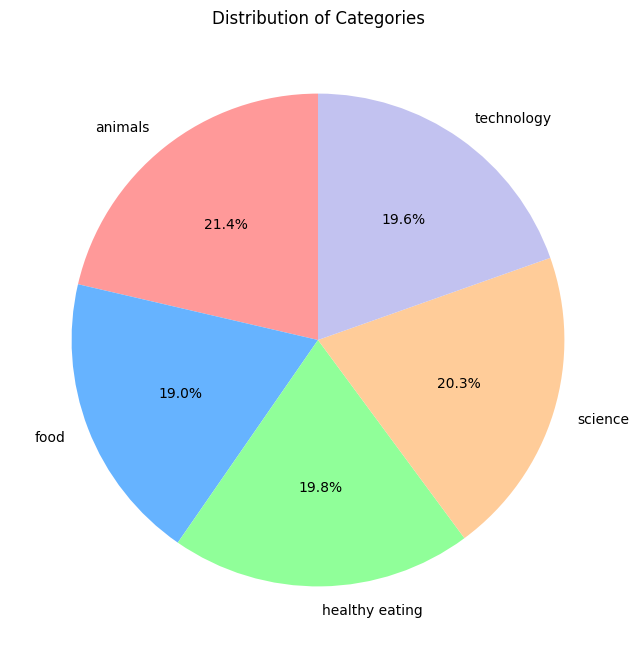

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(new['Score'], labels=new['Category'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#90ff99', '#ffcc99', '#c2c2f0'])
plt.title('Distribution of Categories')
plt.show()


## Visualization 2

In [55]:
reactions2 = pd.read_csv('/content/Reactions.csv')

In [56]:
reactions2.dropna()

,Unnamed: 0,Content ID,User ID,Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58
...,...,...,...,...,...
25547,25547,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [57]:
reactions2.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [58]:
reactions2 = reactions2[['Content ID', 'Datetime']]

In [60]:
import pandas as pd

# Assuming 'Datetime' is in string format
reactions2['Datetime'] = pd.to_datetime(reactions2['Datetime'])

# Now you can apply the strftime method
reactions2['Formatted_Date'] = reactions2['Datetime'].apply(lambda x: x.strftime("%m"))


In [62]:
new4 = reactions2.groupby('Formatted_Date').agg({"Content ID":'count'})

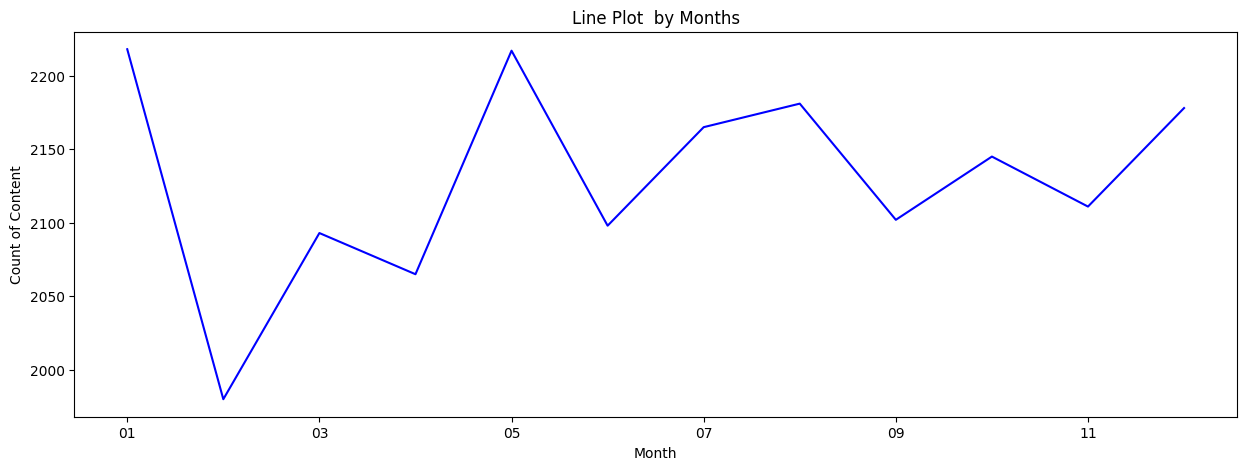

In [64]:
import matplotlib.pyplot as plt

# Assuming new4 is a DataFrame
new4.plot(kind='line', figsize=(15, 5), color=['blue', 'green', 'red'], legend = False)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count of Content')
plt.title('Line Plot  by Months')

# Display the plot
plt.show()